In [4]:

from lightkurve import KeplerTargetPixelFile, KeplerLightCurve
import matplotlib.pyplot as plt

In [35]:
def Cruz_Folded_Lightkurve(q, p):
    'This function takes in lightkurve and period and outputs a phase folded lightcurve for Kepler-10b for every Kepler quarter'
    tpf = KeplerTargetPixelFile.from_archive('kepler-10', quarter=q) #cadence='short',month = 3)
    lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
    %matplotlib inline
    flat_lc = lc.flatten(window_length=401)
    #flat_lc.plot();
    good_lc = flat_lc[lc.quality==0]
    #ax = good_lc.plot();
    bad_lc = flat_lc[lc.quality!=0]
    #bad_lc.plot(ax, marker='.', lw=0, color='red');
    folded_lc = good_lc.fold(period=p, phase=.062)

    #folded_lc.plot();
    binned_lc = folded_lc.bin(binsize=3)
    binned_lc.plot();
    plt.xlim(-.1,.1)
    plt.title("Bin Folded Phase Curve for quarter {}".format(q))
    
    return plt.show()

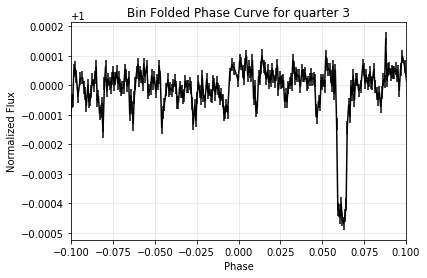

In [37]:
Cruz_Folded_Lightkurve(3,45.29485)

In [ ]:
.062